In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)


In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

634

In [9]:
#Import dependencies
from citipy import citipy
import requests
from Config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1
    #Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | inhambane
Processing Record 3 of Set 1 | kuusamo
Processing Record 4 of Set 1 | mnogovershinnyy
Processing Record 5 of Set 1 | santa cruz
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | houma
Processing Record 11 of Set 1 | bonthe
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | grindavik
Processing Record 14 of Set 1 | ust-kuyga
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | kismayo
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | albany
Processing Record

Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | fort nelson
Processing Record 43 of Set 4 | matay
Processing Record 44 of Set 4 | manakara
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | concarneau
Processing Record 47 of Set 4 | lovington
Processing Record 48 of Set 4 | tupiza
Processing Record 49 of Set 4 | solovetskiy
City not found. Skipping...
Processing Record 50 of Set 4 | samusu
City not found. Skipping...
Processing Record 1 of Set 5 | pringsewu
Processing Record 2 of Set 5 | ponta do sol
Processing Record 3 of Set 5 | ajdabiya
Processing Record 4 of Set 5 | inirida
Processing Record 5 of Set 5 | padang
Processing Record 6 of Set 5 | trincomalee
Processing Record 7 of Set 5 | iracoubo
Processing Record 8 of Set 5 | karaul
City not found. Skipping...
Processing Record 9 of Set 5 | samandag
Processing Record 10 of Set 5 | saleaula
City not found. Skipping...
Processing Record 11 of Set 5 | nantucket
Processing Record 12 of Set 5 | r

Processing Record 27 of Set 8 | champerico
Processing Record 28 of Set 8 | nautanwa
Processing Record 29 of Set 8 | santa rosalia
Processing Record 30 of Set 8 | ambon
Processing Record 31 of Set 8 | santa maria del oro
Processing Record 32 of Set 8 | olinda
Processing Record 33 of Set 8 | newcastle
Processing Record 34 of Set 8 | pevek
Processing Record 35 of Set 8 | ust-ishim
Processing Record 36 of Set 8 | amazar
Processing Record 37 of Set 8 | poum
Processing Record 38 of Set 8 | custoias
Processing Record 39 of Set 8 | tonantins
Processing Record 40 of Set 8 | mahebourg
Processing Record 41 of Set 8 | sulangan
Processing Record 42 of Set 8 | kamaishi
Processing Record 43 of Set 8 | duobao
Processing Record 44 of Set 8 | broome
Processing Record 45 of Set 8 | chabahar
Processing Record 46 of Set 8 | vitoria da conquista
Processing Record 47 of Set 8 | muros
Processing Record 48 of Set 8 | tateyama
Processing Record 49 of Set 8 | haverfordwest
Processing Record 50 of Set 8 | barranc

Processing Record 19 of Set 12 | kiama
Processing Record 20 of Set 12 | camopi
Processing Record 21 of Set 12 | ugoofaaru
Processing Record 22 of Set 12 | anadyr
Processing Record 23 of Set 12 | siderno
Processing Record 24 of Set 12 | kutahya
Processing Record 25 of Set 12 | roald
Processing Record 26 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 27 of Set 12 | gazojak
Processing Record 28 of Set 12 | morgan city
Processing Record 29 of Set 12 | divnogorsk
Processing Record 30 of Set 12 | vanimo
Processing Record 31 of Set 12 | puerto del rosario
Processing Record 32 of Set 12 | norden
Processing Record 33 of Set 12 | tias
Processing Record 34 of Set 12 | sioux lookout
Processing Record 35 of Set 12 | aswan
Processing Record 36 of Set 12 | floro
Processing Record 37 of Set 12 | trogir
Processing Record 38 of Set 12 | dinghai
Processing Record 39 of Set 12 | dosso
Processing Record 40 of Set 12 | ust-nera
Processing Record 41 of Set 12 | terney
Processing Record

In [11]:
len(city_data)

590

In [12]:
#Convert the array of dictionaries into a Pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,35.24,62,0,8.05,US,2022-04-03 02:53:31
1,Inhambane,-23.8650,35.3833,76.73,76,75,6.60,MZ,2022-04-03 02:53:31
2,Kuusamo,65.9667,29.1833,23.04,86,100,6.91,FI,2022-04-03 02:53:32
3,Mnogovershinnyy,53.9353,139.9242,30.11,94,100,6.82,RU,2022-04-03 02:53:32
4,Santa Cruz,-17.8000,-63.1667,65.66,82,0,5.75,BO,2022-04-03 02:53:33
5,Lompoc,34.6391,-120.4579,59.14,86,100,4.61,US,2022-04-03 02:53:33
6,Victoria,22.2855,114.1577,69.33,47,40,10.00,HK,2022-04-03 02:52:16
7,Hilo,19.7297,-155.0900,78.53,79,100,11.50,US,2022-04-03 02:48:57
8,East London,-33.0153,27.9116,67.39,90,100,14.99,ZA,2022-04-03 02:53:34
9,Houma,29.5958,-90.7195,66.20,79,0,5.75,US,2022-04-03 02:49:44


In [13]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-04-03 02:53:31,42.0970,-79.2353,35.24,62,0,8.05
1,Inhambane,MZ,2022-04-03 02:53:31,-23.8650,35.3833,76.73,76,75,6.60
2,Kuusamo,FI,2022-04-03 02:53:32,65.9667,29.1833,23.04,86,100,6.91
3,Mnogovershinnyy,RU,2022-04-03 02:53:32,53.9353,139.9242,30.11,94,100,6.82
4,Santa Cruz,BO,2022-04-03 02:53:33,-17.8000,-63.1667,65.66,82,0,5.75
5,Lompoc,US,2022-04-03 02:53:33,34.6391,-120.4579,59.14,86,100,4.61
6,Victoria,HK,2022-04-03 02:52:16,22.2855,114.1577,69.33,47,40,10.00
7,Hilo,US,2022-04-03 02:48:57,19.7297,-155.0900,78.53,79,100,11.50
8,East London,ZA,2022-04-03 02:53:34,-33.0153,27.9116,67.39,90,100,14.99
9,Houma,US,2022-04-03 02:49:44,29.5958,-90.7195,66.20,79,0,5.75


In [15]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

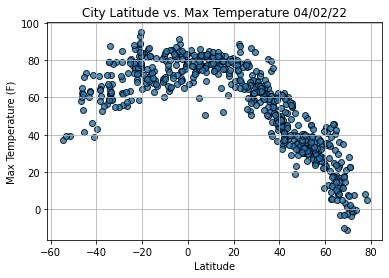

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

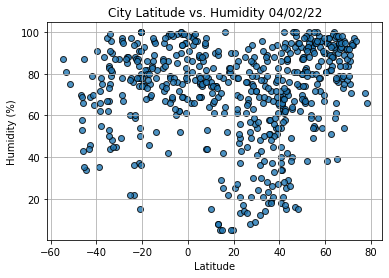

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

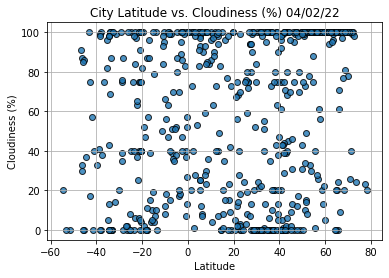

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

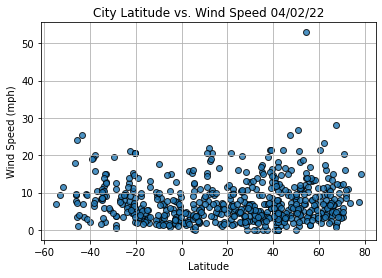

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()